In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

import numpy as np

from multiprocessing import Pool

import seaborn as sns
import matplotlib.pyplot as plt

from modules.utilities.simulation_utils import run_simulation

In [3]:
MAX_ITER = 4000
MAX_STEPS = 2000
WORLDS = ['treasure_island', 'grid', 'wall', 'double_wall', 'tbone', 'maze']

## Agents Comparison

In [4]:
agents = [
    {'normal': {}},
    {'addicted': {'salience_factor': 1.1}}
]

args = []

for world in WORLDS:
    
    for agent in agents:
        
        args.append(
            (
                agent, 
                world, 
                'agents_comparison', 
                MAX_ITER, 
                MAX_STEPS,
                2000
            
            )
        )

In [ ]:
pool = Pool()
sim_summaries = pool.starmap(
    run_simulation,
    args
)
sim_summaries = pd.concat(
    sim_summaries,
    ignore_index=True
)

## Salience Sensitivity Analysis

In [14]:
sim_summaries['value'][1:]

array([array([0.01144031, 0.06478825, 0.0864741 , 0.09998217, 0.10463533,
       0.03114277, 0.06524615, 0.02142435, 0.04859375, 0.0416433 ,
       0.04421001, 0.09165193, 0.01461521, 0.01869174, 0.06406601,
       0.06873084, 0.05331313, 0.06199639, 0.18783095, 0.00279429,
       0.03535951, 0.06808527, 0.06802246, 0.04008585, 0.0067465 ,
       0.1159138 , 0.00174857, 0.05924628, 0.05850003, 0.07431351,
       0.05758395, 0.00194326, 0.22568128, 0.03173501, 0.0320472 ,
       0.05653166, 0.07152751, 0.07330082, 0.41357316, 0.06615899,
       0.0869984 , 0.09418908, 0.0776502 , 0.07062743, 0.02217901,
       0.05315894, 0.03951599, 0.07775217, 0.04747581]),
       array([0.01144031, 0.06478825, 0.12953055, 0.16583767, 0.1597321 ,
       0.06268253, 0.06524615, 0.02142435, 0.04859375, 0.0416433 ,
       0.05477525, 0.12599501, 0.01461521, 0.01869174, 0.06406601,
       0.06873084, 0.05331313, 0.06199639, 0.21362768, 0.00279429,
       0.03535951, 0.06808527, 0.06802246, 0.04008585, 0.0

In [10]:
sim_summaries['value'][0] - sim_summaries['value'][1]

array([ 0.        ,  0.        , -0.02446897, -0.03436775, -0.04112437,
       -0.00438997,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.00046887, -0.02936174, -0.00520929,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00292567, -0.13709163,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.030413  ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.20005543,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.06936332, -0.02595887,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [9]:

sim_summaries = pd.concat(sim_summaries, ignore_index=True)

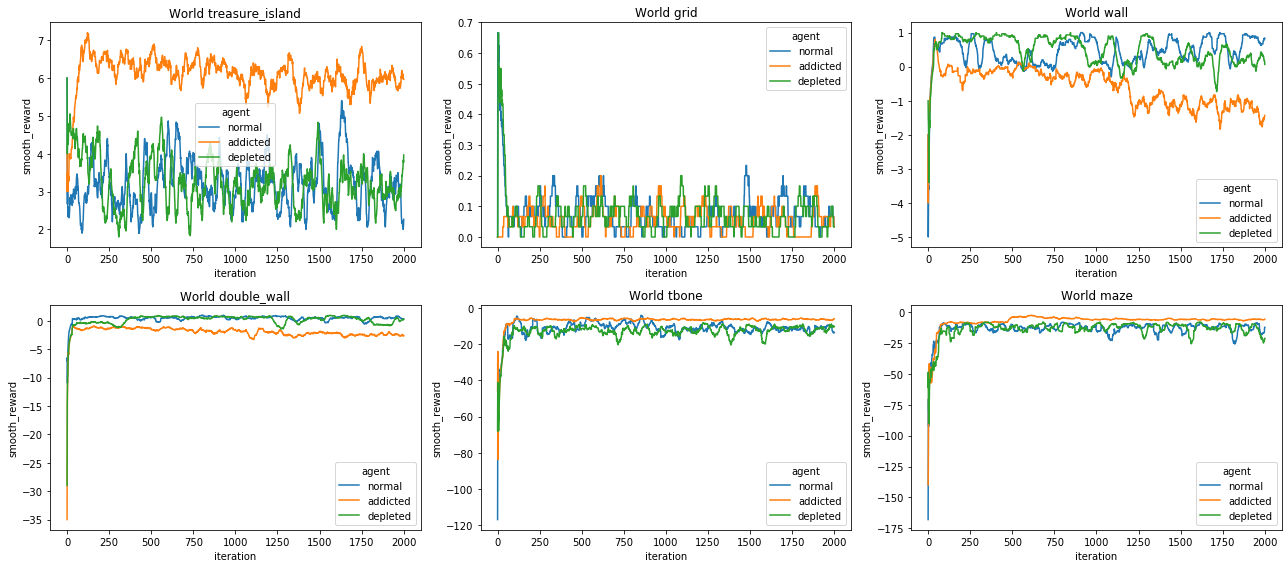

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

for world, ax in zip(WORLDS, axs.flatten()):
    
    sns.lineplot(
        x='iteration',
        y='smooth_reward',
        hue='agent',
        data=sim_summaries[
            sim_summaries['world'] == world
        ],
        ax=ax
    )
    ax.set_title(f'World {world}')

plt.tight_layout()
plt.show()

[      iteration  steps  reward     error  smooth_steps  smooth_reward  \
 0           0.0  394.0     4.0  5.272271    394.000000       4.000000   
 1           1.0  291.0     4.0  4.548012    342.500000       4.000000   
 2           2.0  185.0     2.0  7.756061    290.000000       3.333333   
 3           3.0  227.0     4.0  5.984681    274.250000       3.500000   
 4           4.0   98.0     6.0  9.396971    239.000000       4.000000   
 ...         ...    ...     ...       ...           ...            ...   
 5998     1996.0   91.0     3.0 -1.093730     91.333333       3.900000   
 5999     1997.0   76.0     5.0  1.808993     89.666667       3.966667   
 6000     1998.0   40.0     5.0  5.627689     88.100000       4.000000   
 6001     1999.0  133.0     5.0 -4.584914     87.933333       4.100000   
 6002     2000.0   49.0     4.0  3.097813     86.600000       4.033333   
 
       smooth_error            world     agent  
 0         5.272271  treasure_island    normal  
 1         4